# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Bianca Beer

Datum: 20.11.2023

Gruppe: 77

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie wertet man die Daten aus einer HDF5-Datei aus, um die Wärmekapazität eines Behälters zu berechnen?
In welchem Bereich befindet sich die Wärmekapazität des Behälters?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


Der Aufbau des Versuchs ist sehr simpel: Es gibt eine halbvolle Tasse mit kaltem Wasser, in der einer der Temperatursensoren die Temperatur misst, und eine Tasse mit warmem Wasser, in der der andere Sensor die Temperatur misst, wobei deren Wassermenge noch in die erste Tasse passen soll. Das warme Wasser besitzt eine Temperatur zwischen 40°C und 60°C. Während dem Versuch wird dann das warme Wasser in das kalte gemischt, sodass beide Sensoren schließlich in derselben Tasse die Mischungstemperatur messen. 

Versuchsaufbau vor Mischung:
<img src="figures/experiment_heat_capacity.jpeg" width="800">

Versuchsaufbau nach Mischung:
<img src="figures/experiment_heat_capacity_mix.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
hdf5_path = "data/heat_capacity/heat_capacity.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

# HDF5-File auslesen
f = h5.File(hdf5_path, "r")

# save dataset time in HDF5-File to variable timestamps.
timestamps1 = list(f["RawData/1ee866a2-a87b-6a9e-bb8d-067b4c8ccc7c/time"])
time1 = timestamps1 - timestamps1[0]  # erster Zeitpunkt als Nullpunkt festlegen und folgende Zeitschritte relativ dazu
# save dataset temperature in HDF5-File to variable temperature.
temperature1 = list(f["RawData/1ee866a2-a87b-6a9e-bb8d-067b4c8ccc7c/temperature"])

# save dataset time in HDF5-File to variable timestamps.
timestamps2 = list(f["RawData/1ee8667b-987d-619a-a625-f52b99d6425c/time"])
time2 = timestamps2 - timestamps1[0]  # Zeitschritte relativ zum Nullzeitschritt
# save dataset temperature in HDF5-File to variable temperature.
temperature2 = list(f["RawData/1ee8667b-987d-619a-a625-f52b99d6425c/temperature"])

# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


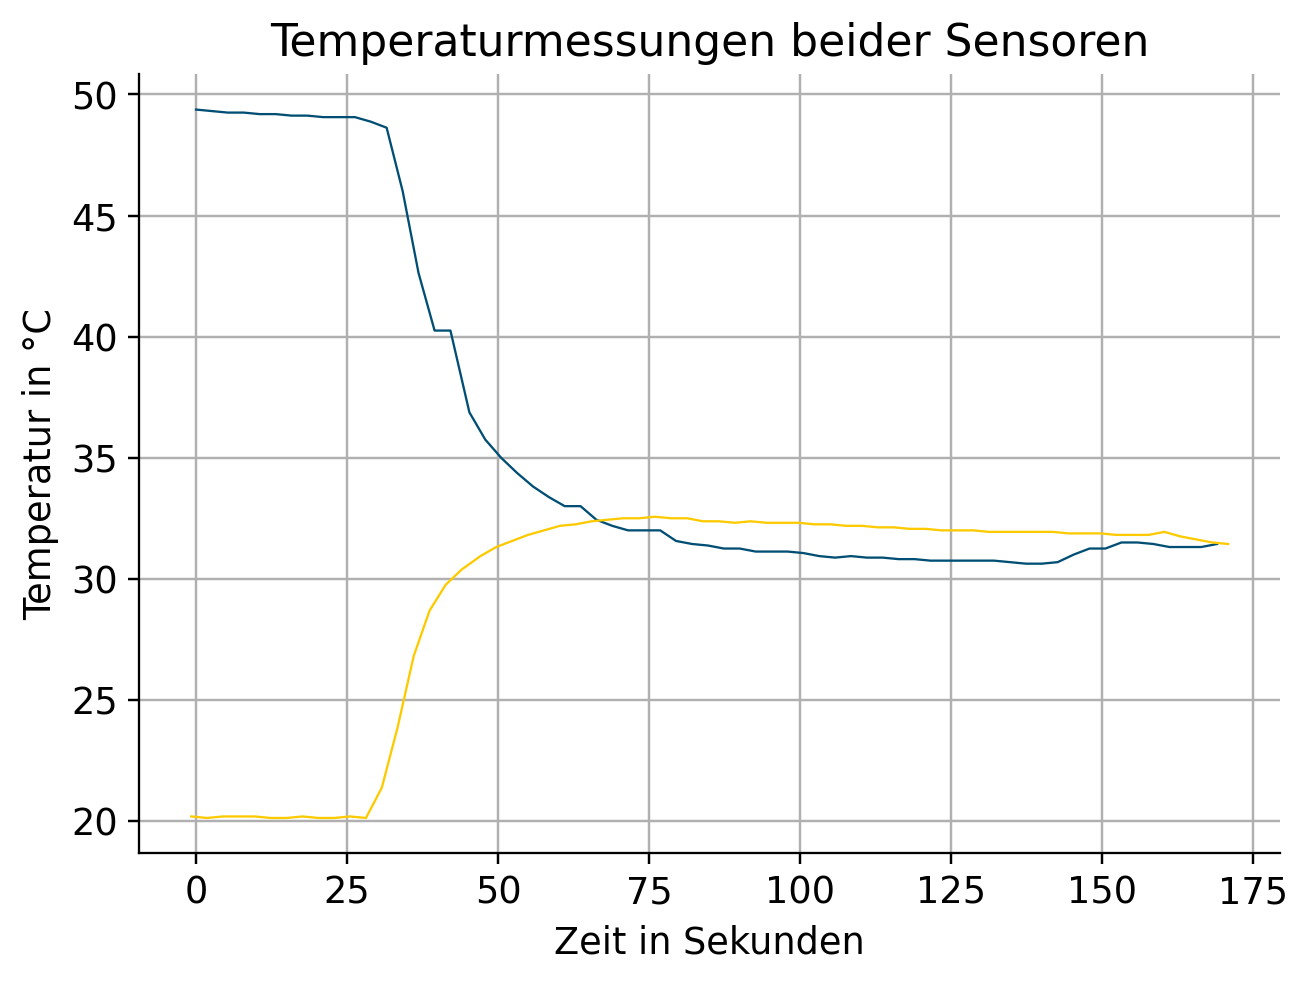

In [4]:
# TODO: Use the temperature and time data for plotting
# Diagramme plotten
plt.plot(time1, temperature1)
plt.plot(time2, temperature2)

# Titel, Achsenbeschriftungen und Gitter hinzufügen
plt.title("Temperaturmessungen beider Sensoren")
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperatur in °C")
plt.grid(True)
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18  # in J/(g*K)

# TODO: Read mass from the metadata of the experiment.
setup_metadata = m_json.get_metadata_from_setup("data/heat_capacity/setup_heat_capacity.json")
uuid_probe = setup_metadata["probe"]["values"][0]
json_path = "data/heat_capacity"
json_path_madd = ["probe", "mass_water_warm", "value"]
json_path_mcup = ["probe", "mass_water_cold", "value"]

madd = m_json.get_json_entry(json_path, uuid_probe, json_path_madd)
mcup = m_json.get_json_entry(json_path, uuid_probe, json_path_mcup)

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
t1 = temperature2[0] # Sensor 1 (kaltes Wasser)
t2 = temperature1[0] # Sensor 2 (warmes Wasser)
# Mittlere Temperatur am Ende
tm = (temperature1[len(temperature1)-1]+temperature2[len(temperature2)-1])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
c = (madd*water_heat_capa*(t2-tm))/(tm-t1)-mcup*water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print("Wärmekapazität: C = " + str(c) + " J/K")

# HDF5-Datei schließen
f.close()
# DONE #

Wärmekapazität: C = 397.56444444444446 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität des Behälters ist höher als erwartet. Jedoch ist zu erwarten, dass der wahre Wert von dem hier ermittelten abweicht, weil die Messung zu ungenau und unkontrolliert war.
Auch der Graph zeigt dabei einen eher ungewöhnlichen Verlauf, da beim Zusammenschütten der Sensor aus der warmen Tasse sogar tiefere Temperaturen misst als der Sensor aus dem kalten Wasser. Vermutlich lässt sich das auf eine Messungenauigkeit zurückführen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch hat mir gezeigt, wie durch einfache Programmierung Datensätze durch Benutzung von HDF5-Dateien ausgewertet werden können, um damit versuchsbezogene Größen zu berechnen oder die Messungen in Diagrammen zu veranschaulichen. Dabei wurde deutlich, wie genau und ordentlich man arbeiten muss, da kleine Fehler bereits zu großen Abweichungen im Resultat führen können, was wiederum zeigt, dass gutes Wissen im Bereich des Datenmanagements von großer Bedeutung zur erfolgreichen Bewertung experimenteller Daten ist.